#### Loading Libraries and Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor

In [4]:
df = pd.read_csv('AmesHousing.csv')

#### Data Understanding

In [6]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [8]:
df.shape

(2930, 82)

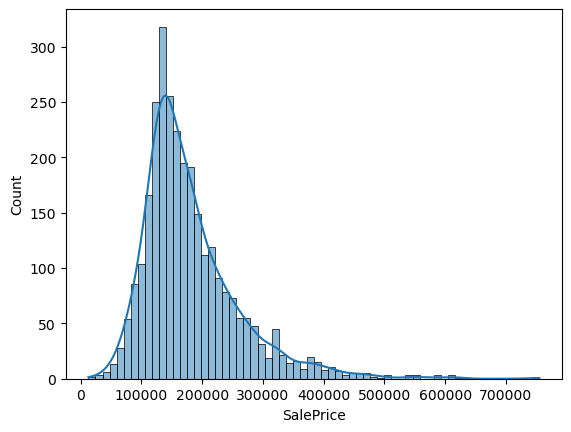

In [9]:
sns.histplot(data = df, x = 'SalePrice', kde = True);

In [10]:
df.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

#### Data Preparation

In [12]:
# Finding columns with NaN values and their counts
df.isnull().sum()[df.isnull().sum() > 0]

Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

In [13]:
# Select columns with more than 500 missing values and remove them
threshold = [col for col in df.columns if df[col].isnull().sum() > 500]
threshold

['Alley', 'Mas Vnr Type', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature']

In [14]:
df.drop(columns = threshold, inplace = True)

In [15]:
df.shape

(2930, 76)

In [16]:
missing_values = df.isnull().sum()[df.isnull().sum() > 0]
missing_values

Lot Frontage      490
Mas Vnr Area       23
Bsmt Qual          80
Bsmt Cond          80
Bsmt Exposure      83
BsmtFin Type 1     80
BsmtFin SF 1        1
BsmtFin Type 2     81
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Electrical          1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Type       157
Garage Yr Blt     159
Garage Finish     159
Garage Cars         1
Garage Area         1
Garage Qual       159
Garage Cond       159
dtype: int64

In [17]:
df.tail()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2925,2926,923275080,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,IR1,Low,AllPub,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2006,WD,Normal,170000
2929,2930,924151050,60,RL,74.0,9627,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,11,2006,WD,Normal,188000


In [18]:
# Numeric Columns

In [19]:
numeric_df = df.select_dtypes(['float64','int64'])
numeric_df.tail()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
2925,2926,923275080,80,37.0,7937,6,6,1984,1984,0.0,...,120,0,0,0,0,0,0,3,2006,142500
2926,2927,923276100,20,NaN,8885,5,5,1983,1983,0.0,...,164,0,0,0,0,0,0,6,2006,131000
2927,2928,923400125,85,62.0,10441,5,5,1992,1992,0.0,...,80,32,0,0,0,0,700,7,2006,132000
2928,2929,924100070,20,77.0,10010,5,5,1974,1975,0.0,...,240,38,0,0,0,0,0,4,2006,170000
2929,2930,924151050,60,74.0,9627,7,5,1993,1994,94.0,...,190,48,0,0,0,0,0,11,2006,188000


In [20]:
numeric_df.fillna(numeric_df.mean(), inplace = True)

In [21]:
numeric_df.tail()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
2925,2926,923275080,80,37.00000,7937,6,6,1984,1984,0.0,...,120,0,0,0,0,0,0,3,2006,142500
2926,2927,923276100,20,69.22459,8885,5,5,1983,1983,0.0,...,164,0,0,0,0,0,0,6,2006,131000
2927,2928,923400125,85,62.00000,10441,5,5,1992,1992,0.0,...,80,32,0,0,0,0,700,7,2006,132000
2928,2929,924100070,20,77.00000,10010,5,5,1974,1975,0.0,...,240,38,0,0,0,0,0,4,2006,170000
2929,2930,924151050,60,74.00000,9627,7,5,1993,1994,94.0,...,190,48,0,0,0,0,0,11,2006,188000


In [22]:
numeric_df.isnull().sum().any()

False

In [23]:
# Categorical Columns

In [24]:
categorical_df = df.select_dtypes('object')

In [25]:
categorical_df.isnull().sum()[categorical_df.isnull().sum() > 0]

Bsmt Qual          80
Bsmt Cond          80
Bsmt Exposure      83
BsmtFin Type 1     80
BsmtFin Type 2     81
Electrical          1
Garage Type       157
Garage Finish     159
Garage Qual       159
Garage Cond       159
dtype: int64

In [26]:
categorical_df.fillna(categorical_df.mode().iloc[0], inplace = True)

In [27]:
categorical_df.isnull().sum().any()

False

In [28]:
# Label encoding

In [29]:
categorical_df.nunique()

MS Zoning          7
Street             2
Lot Shape          4
Land Contour       4
Utilities          3
Lot Config         5
Land Slope         3
Neighborhood      28
Condition 1        9
Condition 2        8
Bldg Type          5
House Style        8
Roof Style         6
Roof Matl          8
Exterior 1st      16
Exterior 2nd      17
Exter Qual         4
Exter Cond         5
Foundation         6
Bsmt Qual          5
Bsmt Cond          5
Bsmt Exposure      4
BsmtFin Type 1     6
BsmtFin Type 2     6
Heating            6
Heating QC         5
Central Air        2
Electrical         5
Kitchen Qual       5
Functional         8
Garage Type        6
Garage Finish      3
Garage Qual        5
Garage Cond        5
Paved Drive        3
Sale Type         10
Sale Condition     6
dtype: int64

In [30]:
for col in categorical_df.columns:
    lbe = LabelEncoder()
    categorical_df[col] = lbe.fit_transform(categorical_df[col])

In [31]:
# One hot encoding

In [32]:
categorical_df = pd.get_dummies(categorical_df, columns = categorical_df.columns ,drop_first = True)

In [33]:
categorical_df.head()

,MS Zoning_1,MS Zoning_2,MS Zoning_3,MS Zoning_4,MS Zoning_5,MS Zoning_6,Street_1,Lot Shape_1,Lot Shape_2,Lot Shape_3,...,Sale Type_5,Sale Type_6,Sale Type_7,Sale Type_8,Sale Type_9,Sale Condition_1,Sale Condition_2,Sale Condition_3,Sale Condition_4,Sale Condition_5
0,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,False,True,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,False,False,True,False,True,False,False,True,...,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [34]:
# Concat

In [35]:
df2 = pd.concat([categorical_df,numeric_df], axis = 1)

In [36]:
df2.head()

,MS Zoning_1,MS Zoning_2,MS Zoning_3,MS Zoning_4,MS Zoning_5,MS Zoning_6,Street_1,Lot Shape_1,Lot Shape_2,Lot Shape_3,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,False,False,False,False,True,False,True,False,False,False,...,210,62,0,0,0,0,0,5,2010,215000
1,False,False,False,True,False,False,True,False,False,True,...,140,0,0,0,120,0,0,6,2010,105000
2,False,False,False,False,True,False,True,False,False,False,...,393,36,0,0,0,0,12500,6,2010,172000
3,False,False,False,False,True,False,True,False,False,True,...,0,0,0,0,0,0,0,4,2010,244000
4,False,False,False,False,True,False,True,False,False,False,...,212,34,0,0,0,0,0,3,2010,189900


In [37]:
df2.isnull().sum().any()

False

In [38]:
correlations = df2.corr()['SalePrice'].sort_values(ascending=False)
correlations

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647861
Garage Area        0.640385
                     ...   
Garage Type_5     -0.365074
Bsmt Qual_4       -0.500510
Garage Finish_2   -0.519339
Kitchen Qual_4    -0.526721
Exter Qual_3      -0.590897
Name: SalePrice, Length: 245, dtype: float64

In [39]:
high_correlations = correlations[abs(correlations) > 0.3]

In [40]:
high_correlations.index

Index(['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars',
       'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath',
       'Year Remod/Add', 'Foundation_2', 'Garage Yr Blt', 'Mas Vnr Area',
       'TotRms AbvGrd', 'Fireplaces', 'Exter Qual_2', 'Neighborhood_19',
       'BsmtFin SF 1', 'BsmtFin Type 1_2', 'Bsmt Exposure_1', 'Sale Type_6',
       'Sale Condition_5', 'Lot Frontage', 'Exterior 1st_13',
       'Exterior 2nd_14', 'Wood Deck SF', 'Open Porch SF', 'Kitchen Qual_2',
       'Lot Shape_3', 'Heating QC_4', 'Bsmt Exposure_3', 'Foundation_1',
       'Garage Type_5', 'Bsmt Qual_4', 'Garage Finish_2', 'Kitchen Qual_4',
       'Exter Qual_3'],
      dtype='object')

In [41]:
df2.head()

,MS Zoning_1,MS Zoning_2,MS Zoning_3,MS Zoning_4,MS Zoning_5,MS Zoning_6,Street_1,Lot Shape_1,Lot Shape_2,Lot Shape_3,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,False,False,False,False,True,False,True,False,False,False,...,210,62,0,0,0,0,0,5,2010,215000
1,False,False,False,True,False,False,True,False,False,True,...,140,0,0,0,120,0,0,6,2010,105000
2,False,False,False,False,True,False,True,False,False,False,...,393,36,0,0,0,0,12500,6,2010,172000
3,False,False,False,False,True,False,True,False,False,True,...,0,0,0,0,0,0,0,4,2010,244000
4,False,False,False,False,True,False,True,False,False,False,...,212,34,0,0,0,0,0,3,2010,189900


In [42]:
df2 = df2[high_correlations.index]

In [43]:
df2.head()

,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Year Built,Full Bath,Year Remod/Add,...,Kitchen Qual_2,Lot Shape_3,Heating QC_4,Bsmt Exposure_3,Foundation_1,Garage Type_5,Bsmt Qual_4,Garage Finish_2,Kitchen Qual_4,Exter Qual_3
0,215000,6,1656,2.0,528.0,1080.0,1656,1960,1,1960,...,False,False,False,False,True,False,True,False,True,True
1,105000,5,896,1.0,730.0,882.0,896,1961,1,1961,...,False,True,True,True,True,False,True,True,True,True
2,172000,6,1329,1.0,312.0,1329.0,1329,1958,1,1958,...,True,False,True,True,True,False,True,True,False,True
3,244000,7,2110,2.0,522.0,2110.0,2110,1968,2,1968,...,False,True,False,True,True,False,True,False,False,False
4,189900,5,1629,2.0,482.0,928.0,928,1997,2,1998,...,False,False,False,True,False,False,False,False,True,True


#### Modeling and Results

In [45]:
X = df2.drop('SalePrice', axis = 1).values
y = df2['SalePrice'].values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42)

In [47]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [48]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [49]:
pred = rf.predict(x_test[11:12])

In [50]:
print('Predicted Value :', pred)
print('Actual Value :', y_test[11:12])

Predicted Value : [227246.51]
Actual Value : [246900]
